# content 
1. [**Introduction**](#Introduction)  
2. [**Word Representation**](#Word_Representation)
3. [**Transformers**](#Transformers)
4. [**USING BERT MODEL FRO TEXT CLASSIFICATION**](#BERT_MODELS)
5. [Dataset](#Dataset)
6. [Loading the Arabic BERT](#our_arabic_bert_model)
7. [take a look](#let's_code)
8. [BERT Inputs](#Model_Inputs)
9. [BERT Outputs](#Model_Outputs)
10. [Custom DataSet Module](#our_custom_dataset_module)
11.[Try the model](#try_the_model)




# Introduction

<div dir="auto">
    الحمد لله الخالق المبدع الذي اتقن كل شيء خلقه و بدأ خلق الانسان من طين والصلاة والسلام علي محمد خير خلقه هادي البشرية
 و معلمها اما بعد  
    
 فان الادراك الحسي عموما و اللغوي بشكل خاص لهو من أعقد المهام التي يقوم بها العقل البشري و التي لطالما عجزت الحواسيب علي مضاهاتها بعكس العمليات الحاسوبية المتسلسلة  sequential_computing التي أظهرت فيها قدرات فائقة متفوقة علي الاداء البشري الذي لم يخلق لتلك المهام حتي جائت فكرة محاكاة عمل خلايا العقل البشري __حتي بالرغم من عدم فهمنا الكامل لطبيعة عمل تلك الخلايا أو كيفية تعلمها__ وذلك من خلال الشبكات العصبية الاصطناعية فسبحان الخالق المبدع  
 وكان مجال الادراك اللغوي و معالجة اللغات الطبيعية __Natural Language Processing__ من أبرز المجالات التي ساهمت الشبكات العصبية الاصطناعية في تحقيق قفزة هائلة في أدائهاالزوايا بينها
</div>

# Word_Representation 
<div dir='rtl'>

  الكلمة هي الوحدة الاساسية لبناء أي لغة و كان التحدي الاول أو المهمة الأساسية هي افهام الكمبيوتر للكلمة 
    *semantic* و كذلك تمييز المعني من خلال السياق الذي وردت به الكلمة *discourse*  بلغته الوحيدة التي يفهمها وهي الارقام فكانت الفكرة هي تمثيل الكلمات بمتجهات في فضاء معين بابعاد معينة بحيث يمكن للكمبيوتر قياس المسافات بين تلك المتجهات  بالرقمية وقياس الزوايا بينها بمعني أخر ادراك الفروقات و التشابهات بين المرادفات المختلفة 

  - البداية كانت بالتمثبل الساذج للكلمة في فضاء بعده هو عدد جميع مرادفات اللغة __one hot vector__ , و هو تمثيل افترض استقلال جميع الكلمات و عدم وجود أي علاقة بينها  اي تمثيل مليوني البعد دون اي دلالة 
  - ثم كانت فكرة عطاء صفات عددية لمتجة الكلمة بناء علي عدد تكراراتها و ظهورها داخل النصوص مما اضاف بعض الدلالة علي متجهات الكلمات و متجهات الجمل __count vectorizing__   اما عن طريق __binary counting__  أو أسلوب __TFIDF__  
  - ثم بدأت ثمارالشبكات العصبية في الظهور بحيث أمكن انتاج متجهات للكلمة __Word2Vec Embeddings__ و ئلك عن طريق تدريب الشبكة العصبية علي كمية كبيرة من البيانات علي أداء مهمة وهمية  __CBOW OR Ngrams__ ثم نخرج من هذا التدريب بمتجه مدرب __pretrained__  لكل مفرد
   ة يحمل الكثير من معناها و دلالاتها و يمكننا استخدامه في جميع الوظائف المتعلقة باللغة دون الحاجة لاعادة تدريبه
  - و في تطور سريع لأداء الشبكات العصبية و اسهاماتها كانت الورقة البحثية  [Attention Is All You Need](https://arxiv.org/abs/1706.03762v5) في العام 2017 و التي اضافت فكرة __self_attention__ للتركيز علي فهم الكلمة في السياقات المختلفة لها و فهم العلاقة بين الكلمات داخ الجملة حتي وان طالت الجملة و بعدت المسافة كما انها كانت الحل لمشكلات الشبكات العصبية التكرارية التي التي عانت من مشكلات تلاشي الانحدارات عند تدريبها لجمل طويلة  كما انها كانت تعد تحوي العديد من الحسابات المتسلسلة البطيئة 

# Transformers
<div dir='auto'>
      ظهرت المحولات لحل مشكلة تمثيل سياق الجملة عوضا عن تمثيل كلماتها بشكل بمستقل و استفادت المحولات من من فكرة الانتباه الذاتي السابق ذكرها والمحولات عموما هي الية لاعطاء الكلمات داخل النص تمثيل يعبر عن سياق النص فيكون تمثيل الكلمة داخل جملة ما مختلف عن تمثيلها داخل جملة أخري و تقوم الفكرة علي اعادة وزن متجهات الكلمات وفقا للسياق  
     اختلاف المحولات فيما بينها هو اختلاف في بنية النموذج نفسة من طبقات الادخال و طبقات الانتباه و عدد رؤوس الانتباه  و من هذة المحولات 
    </div>

   - [GPT-2_OPEN-AI_2018](https://github.com/openai/gpt-2/blob/master/model_card.md) Generative Pretrained for Transformers 
   - [BERT_google-ai_2018](https://arxiv.org/abs/1810.04805) Bidirectional Encoder Representation from Transformer  
   - [T5_google-ai_2019](https://ai.googleblog.com/2020/02/exploring-transfer-learning-with-t5.html) Text_TO_Text Transfer Transformer

# BERT_MODELS
## or Bidirectional Encoder Represention from Transformers
## how to use it

    


# <div dir='rtl'>نماذج بيرت هي محولات تم تدريبها علي بياتات تحت اشراف جزئي للقيام بمهتين علي التوازي و هما 
 ا </div>
 - MLM or Masked Language Model 
 - NSP or Next Sentence Prediction
 <div dir= 'rtl'>
  

<div dir='rtl'>
    
    
- يتم في المهمة الأولي أخفاء كلمات عشوائيا من النص و تدريب النموذج علي توقعها (املأ الفراغات)
   و في هذةا لمهمة يتعلم النموذج السياق داخل الجملة نفسها
- و في المهمة الثانية التي تشبة التصنيف الثنائي (ما ان كانت تلك الجملة تصلح تالية لتلك أم لا)و في هذة المهمة يتعلم النموذج السياق بين الجمل

# let's_code

### first we need to import the needed libraries
- I will use the transformers library to load the pre_trained bert model  
- I will use the pretrained model from [AUB](https://sites.aub.edu.lb/mindlab/2020/02/28/arabert-pre-training-bert-for-arabic-language-understanding/) this model is pretrained by the American Univerisity of Beirut

- pytorch and pytorch_lightning to train the model 


In [1]:
!pip install arabic-stopwords

     |████████████████████████████████| 353 kB 4.5 MB/s 


In [2]:
import numpy as np
import pandas as pd
import transformers
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader
from transformers import  AutoModel,AutoTokenizer
import pytorch_lightning as pl
from torchmetrics.functional import f1
seed = pl.seed_everything(79)
import arabicstopwords.arabicstopwords as ast
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

In [3]:
# setting paddas for better view for our texts
pd.set_option('display.max_colwidth',None)

../input/arabic-reviews# Dataset 
the data I used for this notebook is an edited version form [Arabic 100k Reviews](https://www.kaggle.com/abedkhooli/arabic-100k-reviews)
The dataset combines reviews from hotels, books, movies, products and a few airlines after dropping all mixed_labeld reviews It has two classes ( Negative and Positive) 
The hotels and book reviews were a subset of [HARD and BRAD](https://github.com/elnagara/HARD-Arabic-Dataset )  The rest were selected from airlines reviews collected manually.
<div dir='rtl'>
هنا وفي هذة البيانات استبعدنا المراجعات المختلطة الانطباعات (mixed_labeled) و ذلك للتبسيط و حتي يمكننا اختيار طول الجملة بأريحية دون التقيد بوجوب شمول معظم النص فاصبح لدينا 66666 نص موزعين بالتساوي بين الايجاب والسلب

In [4]:
reviews = pd.read_csv('../input/arabic-reviews/arabic_reviews.csv')

In [5]:
reviews.head()

,label,text
0,Positive,ممتاز. البوفيه المفتوح رائع جدا سواء في الفطور او السحور وتعامل الاستقبال قمة في الذوق والفندق بشكل عام ممتاز.
1,Negative,كتاب حكم النبي محمد الذي كتبه الأديب الروائي الروسي ليو توليستوي للرد علي المناوئين للإسلام والنبي محمد صلي الله عليه وسلم . إتطلعت عليه فوجدته ملئ بالأحاديث الضعيفة وأقوال الزهاد والصوفية . ولكنه وعد بالكتابة عن النبي في كتاب كامل وللأسف يبدو بأنه لم يف بوعده حتي وافته المنية أو أنه بدأ بكتابته علي أرجح الأحوال ولم يكمله. فائدته للقارئ المسلم ضئيلة ولكن الفائدة لغير المسلم قد تكون مؤثرة ؛ فإذا كان ليو قد إنبهر بالدين الإسلامي فما بالك بغيره من معجيبه. لكن تبقي رائعته الحرب والسلام هي سيدة الساحة بين جميع أعماله ؛ فمن العجيب أن تعرف ان هذه الوراية التي تبلغ عدد صفحاتها بالترجمة العربية أكثر من ألفين صفحة ؛ قد أثرت في عقول الكثير من الثائرين علي الانظمة الإستبدادية . يقال بأن مارتن لوثر كينج وغاندي ومنديلا قرؤاها فاثرت في عقيلتهم الثورية ضد العبودية والرق والظلم وحاربوا تلك الانظمة من غير إستخدام الأسلحة بطريقة تسمي ب : الكفاح السلمي . =
2,Positive,معلومات تاريخية عن الثورة الإيرانية وما حدث فيها بتفاصيل ليست مملة، معلومات عن الفترة التي خاضت إيران الحرب ضد العراق، رواية شيقة تاريخيا وأيضا عن كونها قصة حقيقية فهذا يدعم نجاحها.
3,Negative,جلال أمين لم يجد إجابه للسؤال، فأخد يسرد لنا قصصا تسوق إستنتجات ليست منطقيه.. صنية بسبوسه إستثمار أفضل من شراء الكتاب
4,Positive,شقة ممتازة . أعجبني كل شيء وخاصة طاقم العمل..


**to ake a look of the reviews length distribution to to choose our sequence length**

In [6]:
reviews['text_len'] = reviews.loc[:,'text'].apply(lambda x:len(x.split()))

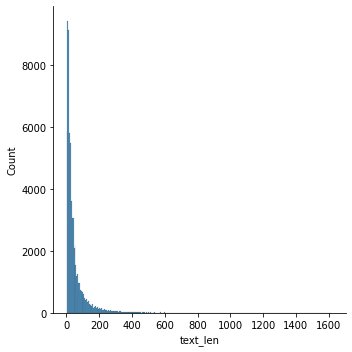

In [7]:
sb.displot(reviews.text_len,bins=300)

<AxesSubplot:xlabel='label', ylabel='text_len'>

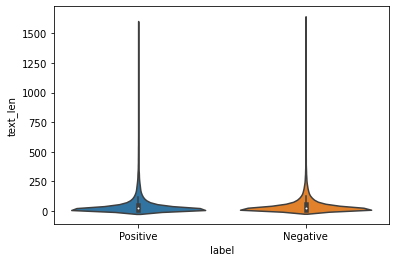

In [8]:
sb.violinplot(x=reviews.label, y=reviews.text_len)

In [9]:
reviews.describe()

,text_len
count,66666.000000
mean,54.688357
std,96.740354
min,1.000000
25%,12.000000
50%,26.000000
75%,56.000000
max,1622.000000


<div dir="rtl">
    
### نري بوضوح ان قيم أطوال معظم النصوص يتمركز حول المتوسط مع وجود نصوص شاذة شديدة الطول و أخري قصيرة و بما أننا أستبعدنا النصوص المختلطة الانطباعات فان طول 64 كلمة سيكون مناسب و كافي للنموذج لكشف الانطباع 

# Some Preprocessing helps our model

In [10]:
#getting a stopwords_list
stop_words = ast.stopwords_list()

In [11]:
# a small function to remove stop words
def remove_stop_words(text):
    return ' '.join(word for word in text.split() if word not in stop_words)

In [12]:
reviews['text'] = reviews['text'].apply(remove_stop_words)

In [13]:
## encoding our categorical labels
reviews['label'] = reviews['label'].astype('category').cat.codes

In [14]:
reviews.head()

,label,text,text_len
0,1,ممتاز. البوفيه المفتوح رائع سواء الفطور او السحور وتعامل الاستقبال قمة الذوق والفندق بشكل عام ممتاز.,19
1,0,كتاب حكم النبي محمد كتبه الأديب الروائي الروسي ليو توليستوي للرد المناوئين للإسلام والنبي محمد صلي الله وسلم . إتطلعت فوجدته ملئ بالأحاديث الضعيفة وأقوال الزهاد والصوفية . وعد بالكتابة النبي كتاب كامل وللأسف يبدو يف بوعده حتي وافته المنية بدأ بكتابته أرجح الأحوال يكمله. فائدته للقارئ المسلم ضئيلة الفائدة المسلم تكون مؤثرة ؛ ليو إنبهر بالدين الإسلامي بالك معجيبه. تبقي رائعته الحرب والسلام سيدة الساحة أعماله ؛ العجيب تعرف ان الوراية تبلغ عدد صفحاتها بالترجمة العربية ألفين صفحة ؛ أثرت عقول الكثير الثائرين الانظمة الإستبدادية . يقال مارتن لوثر كينج وغاندي ومنديلا قرؤاها فاثرت عقيلتهم الثورية ضد العبودية والرق والظلم وحاربوا الانظمة إستخدام الأسلحة بطريقة تسمي : الكفاح السلمي . =,154
2,1,معلومات تاريخية الثورة الإيرانية حدث بتفاصيل مملة، معلومات الفترة خاضت إيران الحرب ضد العراق، رواية شيقة تاريخيا كونها قصة حقيقية يدعم نجاحها.,31
3,0,جلال أمين يجد إجابه للسؤال، فأخد يسرد قصصا تسوق إستنتجات منطقيه.. صنية بسبوسه إستثمار أفضل شراء الكتاب,21
4,1,شقة ممتازة . أعجبني شيء وخاصة طاقم العمل..,9


## *Note* :   the more time you spend cleaning your data the better performance you can get from your model specially with arabic texts

- some useful libraries to clean your arabic text
    - [farasa](https://farasa.qcri.org/) is very good for stemming and segmentation 
    - [pyarabic](https://github.com/linuxscout/pyarabic) for normalization
    - [cleantext](https://pypi.org/project/cleantext/) for general purpose
    

# our_arabic_bert_model 
##### I will use a pre_trained BERT model that is trained by [aub](https://sites.aub.edu.lb/mindlab) the american univerisiy in Beirut 
## you can use any other pre_trained model if you want , even you can train your own model

In [15]:
#load your pre_trained model with all its weights 
model_name= 'aubmindlab/bert-base-arabertv02'  
tokenizer =AutoTokenizer.from_pretrained(model_name) 
model=AutoModel.from_pretrained(model_name,output_hidden_states=True)

Downloading:   0%|          | 0.00/384 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/825k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.64M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/381 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/543M [00:00<?, ?B/s]

# Model_Inputs
<div dir='rtl'>
    
# كيف يتوقع النموذج شكل المدخلات ؟

# يتوقع نموذج بيرت أستقبال ثلاث أنواع من المدخلات 
- أرقام الرموز أو الفردات ليحولها الي متجهات لكل رمز  __ids__ for word embeddings 
-متجه يوضح ما ان كان الرمز من الجملة الأولي أم الثاني __لاحظ أن النموذج يتوقع ادخال زوج من الجمل__ __token_type__
- متجه لموقف كل رمز من ألاخفاء __attention_mask__
    

# let's take an Example

In [16]:
example = 'اللهم صلي و سلم و بارك علي نبينا و قدوتنا و سائر الأنبياء و المرسلين'
tokenizer.tokenize(example)

['اللهم',
 'صلي',
 'و',
 'سلم',
 'و',
 'بارك',
 'علي',
 'نبينا',
 'و',
 'قد',
 '##وتنا',
 'و',
 'سائر',
 'الأنبياء',
 'و',
 'المرسل',
 '##ين']

## <div dir='rtl'>لاحظ أن الترميز هنا مقطعي __subwords tokenization__

In [17]:
inputs = tokenizer.encode_plus(example,return_tensors='pt')
inputs

{'input_ids': tensor([[    2, 17369, 23162,   139,  4121,   139, 13843,   485, 42749,   139,
           602, 21036,   139, 13777, 29969,   139, 39226,   307,     3]]), 'token_type_ids': tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]), 'attention_mask': tensor([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]])}


# <div dir='rtl'>و هذه هي المدخلات التي يتوقعها نموذج بيرت             

# Model_Outputs

In [18]:
outputs = model(inputs['input_ids'],inputs['attention_mask'],inputs['token_type_ids'])
outputs

BaseModelOutputWithPoolingAndCrossAttentions(last_hidden_state=tensor([[[-0.8481, -0.0841, -0.7671,  ...,  0.4467,  0.3482,  1.1027],
         [-0.8629,  0.2307, -0.4628,  ...,  1.0948, -0.3342,  1.1148],
         [-1.0004,  0.6550,  0.4998,  ...,  1.9027,  0.9023,  1.4543],
         ...,
         [-1.1108,  0.3009,  0.4369,  ...,  0.5287,  0.0194, -0.6139],
         [-1.2834,  1.5557,  0.0913,  ...,  0.1843, -0.3668, -0.3590],
         [-0.6697,  0.1011, -0.9898,  ...,  0.4475,  1.5683,  0.1806]]],
       grad_fn=<NativeLayerNormBackward>), pooler_output=tensor([[ 0.7161,  0.9787,  0.5475, -0.9516,  0.7781,  0.9949,  0.9828,  0.8399,
          0.8243, -0.9943,  0.9998, -0.1477,  0.9990, -0.9964, -0.9772, -0.9014,
         -0.9149, -0.9975, -0.9983,  0.9731, -1.0000,  1.0000,  0.8615, -1.0000,
          0.9995,  0.9114, -0.9995,  0.9999,  0.9810,  0.9992, -0.8597, -0.7587,
         -0.1879,  0.5579,  0.7992,  0.9772,  0.9331,  1.0000, -0.9967, -0.5505,
          1.0000, -1.0000,  1.000

In [19]:
outputs['last_hidden_state'].shape

torch.Size([1, 19, 768])

<div dir='rtl'>
    
    
# هنا لدينا  جملة واحد من 19 رمز لكل رمز متجة من 768 بعد و هذة هي مخرجات الطبقة الأخيرة من النموذج   
# فكم طبقة لدينا ؟

In [20]:
len(outputs['hidden_states'])

13

<div dir='rtl'>
    
# اذن لدينا 13 طبقة مماثلة للطبقة الأخيرة و هي 12 طبقات النموذج بالاضافة الي الطبقة الاولي __word embedding__ 

## our control Panel

In [21]:
train_size = 0.8
batch_size = 128
lr = .00001
max_len = 64

# our_custom_dataset_module

In [22]:
class MyDataset(Dataset):
    def __init__(self, dataframe, tokenizer, max_len , train=True):
        self.train_set = dataframe.sample(frac=train_size,random_state=seed)
        self.test_set = dataframe.drop(self.train_set.index).reset_index(drop=True)
        self.tokenizer = tokenizer
        self.data = self.train_set if train else self.test_set
        self.text = self.data.text
        self.max_len = max_len
        
    def __len__(self):
        return len(self.text)

    def __getitem__(self, index):
        text = str(self.text.iloc[index])
        text = " ".join(text.split())

        inputs = self.tokenizer.encode_plus(
            text,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            truncation=True,
            padding='max_length',
            return_token_type_ids=True,
        )
        self.labels = self.data.label.iloc[index]
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]

       
        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'labels': torch.tensor(self.labels, dtype=torch.long)
        }

<div dir='rtl'>
    
    
# يمكننا أن نستخدم نموذج بيرت بأكثر من طريقة
    - يمكن ان نستخدم هيكلية النموذج بدون أوزان و نقوم بتدريبة علي بياناتنا الخاصة
    - يمكن أن نستخدم فقط الطبقة الأخيرة من النموذج كتمثيل رقمي للكلمات داخل الجملة ثم نضيف طبقة التصنيف
    -  يمكن أن نستخدم عدد من الطبقات الأخيرة من النموذج ثم  طبقة تصنيف و ذلك بعدة طرق مثل الصف concatinating   أو التجميع pooling  أو المتوسط
    - في كل الحالات يمكننا أن نثبت أوزان النموذج و نقوم بأمثلة أوزان طبقة التصنيف فقط أو نقوم بأمثلة جميع الاوزان 


<div dir='rtl'>
    
# هنا سوف نقوم بتدريب أوزان طبقة التصنيف فقط و تثبيت أوزان النموذج المسبقة التدريب و سوف نقوم باستخدام مخرجات أخر أربعة طبقت من النموذج عن طريق صفها و أرسالها لطبقة التصنيف

# try_the_model

In [23]:
for param in model.parameters():
    param.requires_grad = False

In [24]:
class Bert(pl.LightningModule):
    def __init__(self,batch_size=batch_size,lr=lr):
        super(Bert,self).__init__()
        self.l1 = model
        self.l2 = nn.Linear(196608,2)
        self.drop = nn.Dropout(.3)
        self.batch_size = batch_size
        self.lr=lr
        
    def forward(self, ids, mask, token_type_ids):
        out = self.l1(ids, mask, token_type_ids)['hidden_states']
        out = torch.stack(out,dim=0)
        out = out[-4:][:][:][:]
        out = out.permute(1,0,2,3)
        out= out.reshape(out.size(0),-1)
        out = self.drop(self.l2(out))
        return out
        
    def training_step(self,batch,batch_idx):
        ids = batch['ids']
        mask = batch['mask']
        token_type_ids = batch['token_type_ids']
        x = self(ids=ids, mask = mask, token_type_ids = token_type_ids)
        y = batch['labels']
        loss = F.cross_entropy(x,y)
        x=x.max(1)[1]
        f1_score =f1(x,y,num_classes=2)
        self.log('train_f1',f1_score,on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('training_loss',loss,on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss
       
    def validation_step(self,batch,batch_inx):
        ids = batch['ids']
        mask = batch['mask']
        token_type_ids = batch['token_type_ids']
        x= self(ids=ids, mask = mask, token_type_ids = token_type_ids)
        y= batch['labels']
        loss = F.cross_entropy(x,y)
        x=x.max(1)[1]
        f1_score = f1(x,y,num_classes=2)
        self.log('val_f1',f1_score,on_step=True, on_epoch=True, prog_bar=True, logger=True)
        self.log('val_loss',loss,on_step=True, on_epoch=True, prog_bar=True, logger=True)
        return loss
    def configure_optimizers(self):
        
        return optim.RMSprop(self.l2.parameters(),lr=self.lr)
    
    def train_dataloader(self):
        train_set = MyDataset(reviews,tokenizer,max_len,train=True)
        train_loader = DataLoader(train_set,shuffle=True,batch_size=batch_size,num_workers=0)
        return train_loader
    
    def val_dataloader(self):
        val_set = MyDataset(reviews,tokenizer,max_len,train=False)
        val_loader = DataLoader(val_set,shuffle=True,batch_size=batch_size,num_workers=0)
        return val_loader
 
        
arabic = Bert()

In [25]:
early_stop = pl.callbacks.EarlyStopping('val_loss',patience=3,mode ='min')

In [26]:
trainer=pl.Trainer(gpus=1,callbacks=early_stop)

MisconfigurationException: You requested GPUs: [0]
 But your machine only has: []

In [27]:
trainer.fit(arabic)

NameError: name 'trainer' is not defined

<div dir='rtl'>
    
# حاول تجريب الاستراتيجيات الأخري لأستخدام النموذج و حاول أستخدامة في مهمات أخري و بيانات مختلفة و اترك انطباعك أو استفساراتك أو أفكارك هنا لنتشارك 

<div dir='rtl'>
    
# اللهم انفعنا بما علمتنا ، وعلّمنا ما ينفعنا ، وزدنا علماً